<a href="https://colab.research.google.com/github/dawoodwasif/Digital-Image-Processing-Techniques/blob/main/DIP_Lab12_Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#neccessary imports
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

## 1. Read input image

In [ ]:
#read image in grayscale
gray_img = cv2.imread('image_lab12.png', 0)

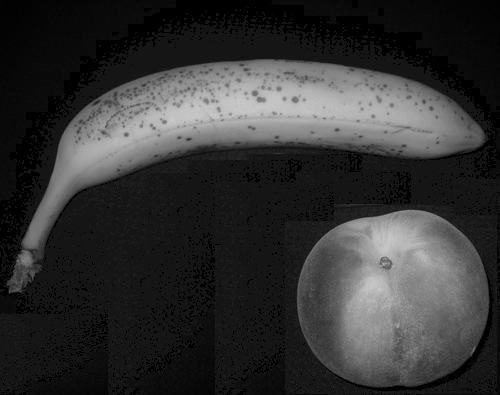

In [ ]:
Image.fromarray(gray_img)

## 2. Use thresholding (Otsu’s method) to segment foreground from background 

In [ ]:
# apply otsu thresholding buil-in function 
ret,th_img = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

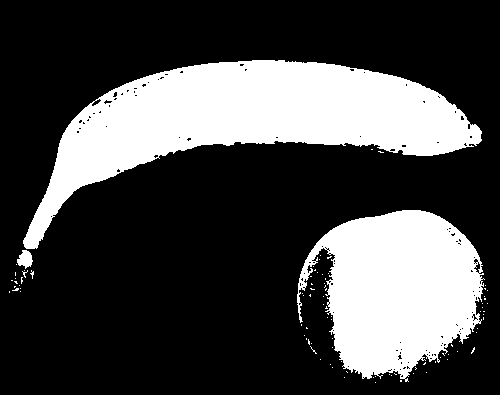

In [ ]:
Image.fromarray(th_img)

## 3. Clean the binary image using appropriate morphological operations

In [ ]:
# chose optimum shape and size of kernels for morphological operations through extensive trial and error
close_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(23,23))
op_kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(13,14))

# apply morpholocal operations i.e closing followed by opening
close_img = cv2.morphologyEx(th_img, cv2.MORPH_CLOSE, close_kernel)
op_img = cv2.morphologyEx(close_img, cv2.MORPH_OPEN, op_kernel)


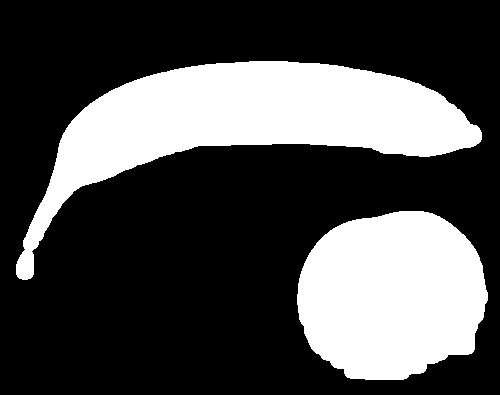

In [ ]:
Image.fromarray(op_img)

## 4. Label the objects using different color values

In [ ]:
# apply connected components with statistics built-in function with 8 connectivity
conn = cv2.connectedComponentsWithStats(op_img, 8, cv2.CV_32S)
num_labels = conn[0] # number of labels or objects
labels = conn[1].astype('uint8') # label matrix containing in which objects intensity increase sequentially
stats = conn[2] # statistic matrix containing different measures
centroids = conn[3] # centrids which are the mean center of each object

#convert from gs to rgb by replicating the grayscale intesnities
rgb_img = cv2.cvtColor(labels,cv2.COLOR_GRAY2RGB) 
col_img = rgb_img.copy()

# Gold yellow for Banana
r1, g1, b1 = 255, 192, 0 

# Bright red for apple 
r2, g2, b2 = 210, 43, 43

# find indices of each object using the given intensity values
mask1 = np.all(rgb_img == (1, 1, 1), axis=-1)
mask2 = np.all(rgb_img == (2, 2, 2), axis=-1)

# apply masks to highlight each object with a pre-defined color
col_img[mask1] = [r1, g1, b1]
col_img[mask2] = [r2, g2, b2]



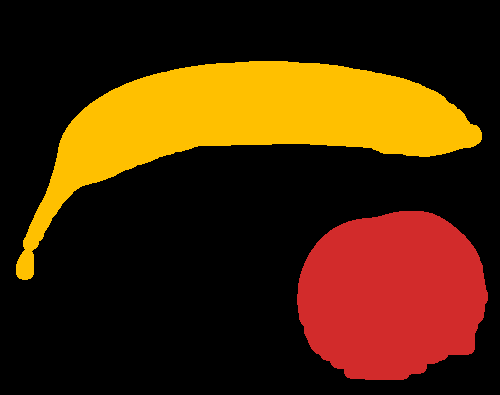

In [ ]:
Image.fromarray(col_img)

## 5. Ask user to select any available color 

In [ ]:
# Display menu for the user
print("Objects Identified (excluding background): " + str(num_labels-1))
print("Please select from any of the following colour:")
print("1. Yellow of size: " + str(stats[1, cv2.CC_STAT_AREA]) + ' pixels')
print("2. Red of size: " + str(stats[2, cv2.CC_STAT_AREA]) + ' pixels')

Objects Identified (excluding background): 2
Please select from any of the following colour:
1. Yellow of size: 34010 pixels
2. Red of size: 25608 pixels


## 6. Count the objects with the specified color


Enter yellow, red or exit:
yellow


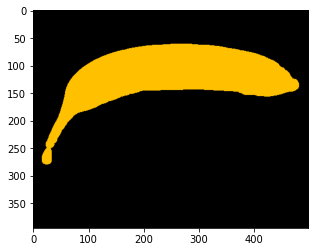


Enter yellow, red or exit:
red


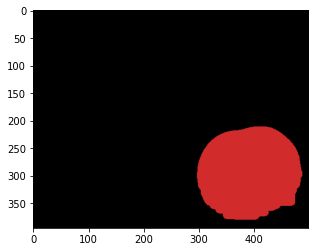


Enter yellow, red or exit:
blue
Wrong input. Try again!

Enter yellow, red or exit:
exit


In [ ]:
# iterate infinitely
for _ in iter(int, 1):
  print("\nEnter yellow, red or exit:")
  inp = input()
  # if yellow then zero the red object
  if inp == 'yellow':
     output = col_img.copy()
     output[mask2] = 0
     plt.figure()
     plt.imshow(output) 
     plt.show()  # display yellow image

  # if red then zero the yellow object
  elif inp == 'red':
     output = col_img.copy()
     output[mask1] = 0
     plt.figure()
     plt.imshow(output) 
     plt.show()  # display red image

  # exit the for loop   
  elif inp == 'exit':
     break
  else:
    print("Invalid input. Try again!")
